## Deep Learning with MLP applied to Handwritten digit recognition using keras
### tensorflow 2.0
### Edgar Acuna
### Abril 2021
### running time: 2 minutos

In [28]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [30]:
# Configuration options
feature_vector_length = 784
num_classes = 10


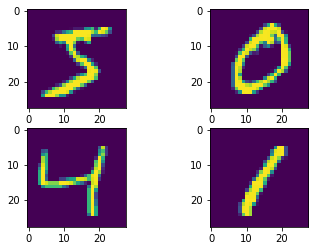

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(X_train[0])
ax2.imshow(X_train[1])
ax3.imshow(X_train[2])
ax4.imshow(X_train[3])

In [32]:
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)


In [33]:
# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [34]:
# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')


Feature shape: (784,)


In [35]:
# Create the neural network with two hidden layers. The first one with 350 neurons and the second one with 50 neurons
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)


Epoch 1/10
192/192 [==============================] - 4s 15ms/step - loss: 0.7094 - accuracy: 0.8026 - val_loss: 0.1763 - val_accuracy: 0.9505
Epoch 2/10
192/192 [==============================] - 2s 11ms/step - loss: 0.1564 - accuracy: 0.9549 - val_loss: 0.1262 - val_accuracy: 0.9642
Epoch 3/10
192/192 [==============================] - 2s 11ms/step - loss: 0.1008 - accuracy: 0.9706 - val_loss: 0.1041 - val_accuracy: 0.9672
Epoch 4/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0703 - accuracy: 0.9801 - val_loss: 0.0992 - val_accuracy: 0.9701
Epoch 5/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0523 - accuracy: 0.9854 - val_loss: 0.0915 - val_accuracy: 0.9710
Epoch 6/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0415 - accuracy: 0.9886 - val_loss: 0.0800 - val_accuracy: 0.9749
Epoch 7/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0315 - accuracy: 0.9907 - val_loss: 0.0793 - val_accuracy: 0.9765

In [36]:
# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0761 - accuracy: 0.9779
Test results - Loss: 0.07610731571912766 - Accuracy: 0.9779000282287598%
